# Spotify Top Tracks Analysis

## Introduction


  <li>The <b>music industry</b> has undergone significant changes over the past decade, with the rise of streaming platforms like Spotify transforming the way people listen to and discover music. </li>
  <li>This project aims to explore these changes by analyzing the top songs from each year for the past decade on <b>Spotify</b>. By examining various song parameters such as tempo, genre, and instruments, we hope to identify key trends and draw meaningful conclusions about the evolution of popular music.</li>
  <li>Spotify is the <b>number one platform</b> worldwide that people choose to listen, save and share their favourite songs, albums and playlists. So I think for the purpose of this project Spotify is going to be the best tool to analyze trends in the modern composition of music with contemporary artists that are constantly in the charts.  </li>
 
## Research Questions

1. What genres have been most popular over the past decade?
2. How has the average tempo of top songs changed over time?
3. What musical characteristics are most common in top songs?
4. Can we predict future music trends based on past data?
5. Could artists secure a viral song given the insights the data provides us?

## Project Outline

1. **Data Acquisition**: We will use the Spotify API to gather data on the top songs from each year for the past decade.
2. **Data Cleaning**: We will preprocess the data to ensure it is suitable for analysis.
3. **Exploratory Data Analysis**: We will analyze the data to identify key trends and patterns.
4. **Conclusion**: We will summarize our findings and discuss the implications of our work.

By the end of this project, we aim to have a deeper understanding of the trends in the music industry and how they have evolved over time. We also hope to gain insights into the future of music and what trends we might expect in the coming years.

## Table of Contents
1. [Spotify API](#spotifyapi)
2. [Data Acquisition](#dataacquisition)
3. [Understanding The Data](#understandingdata)
4. [Exploratory Data Analysis](#eda)
5. [Popularity Predictor Model](#model)
6. [Conclusion](#conclusion)

## Setting Up the Environment
To run this notebook, you need to have certain Python libraries installed. If you haven't installed them yet, uncomment the following line and run the cell:

In [1]:
#!pip install -r requirements.txt

Remember to place the requirements.txt file in the same directory as the Jupyter notebook.

<h1>1. Spotify API</h1> <a name="spotifyapi"></a>

## Connecting to the Spotify API

To access the data from Spotify, we utilized the Spotify Web API. This API provides access to various Spotify data, such as album listings, artist information, playlists, and more. 

The process involves the following steps:

1. **API Authorization**: We first need to authorize our application to access Spotify's data. This is done by generating an access token using our application's Client ID and Client Secret on the Spotify Developer Dashboard.

2. **Data Request**: Once authorized, we can make requests to the API's various endpoints to retrieve the data we're interested in. In our case, we're primarily interested in the top tracks and their audio features.

In [ ]:
#Installing spotipy library so we can use pre defined functions that are going to be helpful for the purpose of this EDA project.
!pip install spotipy

In [2]:
# Import necessary libraries
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set up spotipy client
client_id = '448637bc413544faa62e4f16eaa4f17d'
client_secret = '71e63d4cc902404585a69ca144c2c1b0'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

<h1>2. Data Acquisition</h1> <a name="dataacquisition"></a>

**Data Collection**: The data returned by the API is typically in JSON format. We parse this data and convert it into a more manageable format (like a pandas DataFrame) for further analysis.

## 2.1 Fetching Current Global Top 50 Tracks

In this section, we will fetch the current global top 50 tracks from a Spotify playlist. The Spotify API allows us to fetch the tracks from a playlist using its ID. We will first find the ID of the global top 50 playlist, and then use it to fetch the tracks.
We are going to define a function to get the tracks from a specified playlist.

In [3]:
# Function to get the tracks from a playlist
def get_playlist_tracks(playlist_id):
   # Get the tracks from the specified playlist
    playlist_tracks = sp.playlist_tracks(playlist_id)

    # Extract track details
    track_details = []
    for item in playlist_tracks['items']:
        track = item['track']
        details = {}
        details['id'] = track['id']
        details['name'] = track['name']
        details['artist'] = track['artists'][0]['name']
        details['duration_ms'] = track['duration_ms']
        details['popularity'] = track['popularity']

        # Get audio features for each track
        audio_features = sp.audio_features(track['id'])[0]
        details['danceability'] = audio_features['danceability']
        details['energy'] = audio_features['energy']
        details['key'] = audio_features['key']
        details['loudness'] = audio_features['loudness']
        details['mode'] = audio_features['mode']
        details['speechiness'] = audio_features['speechiness']
        details['acousticness'] = audio_features['acousticness']
        details['instrumentalness'] = audio_features['instrumentalness']
        details['liveness'] = audio_features['liveness']
        details['valence'] = audio_features['valence']
        details['tempo'] = audio_features['tempo']

        track_details.append(details)

    # Convert to dataframe
    df = pd.DataFrame(track_details)

    return df

# Get the tracks from the global top 50 playlist
global_top_50 = get_playlist_tracks('37i9dQZEVXbMDoHDwVN2tF')
global_top_50.head()

,id,name,artist,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),Jung Kook,184400,86,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997
1,7ABLbnD53cQK00mhcaOUVG,LALA,Myke Towers,197920,96,0.708,0.737,1,-4.045,1,0.0436,0.0739,0.001620,0.0955,0.607,91.986
2,3k79jB4aGmMDUQzEwa46Rz,vampire,Olivia Rodrigo,219724,98,0.511,0.532,5,-5.745,1,0.0560,0.1690,0.000000,0.3110,0.322,137.827
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,178426,99,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
4,3qQbCzHBycnDpGskqOWY0E,Ella Baila Sola,Eslabon Armado,165671,93,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,147.989


## 2.2 Fetching Top Hits of Each Year from 2013 to 2022 <a name='2013-2023'></a>

As we already have the current global top 50 we are going to use Spotify's playlist for top hits of each year. So in this section, we will fetch the tracks from the 'Top Hits of {year}' playlists for each year from 2013 to 2022. We will use the `get_playlist_tracks` function to fetch the track details and then use the `get_track_features` function to fetch the features for each track.

In [4]:
import time
# Dictionary with years as keys and playlist IDs as values
playlist_ids = {
    2013: '37i9dQZF1DX3Sp0P28SIer',
    2014: '37i9dQZF1DX0yEZaMOXna3',
    2015: '37i9dQZF1DX9ukdrXQLJGZ',
    2016: '37i9dQZF1DX8XZ6AUo9R4R',
    2017: '37i9dQZF1DWTE7dVUebpUW',
    2018: '37i9dQZF1DXe2bobNYDtW8',
    2019: '37i9dQZF1DWVRSukIED0e9',
    2020: '2fmTTbBkXi8pewbUvG3CeZ',
    2021: '5GhQiRkGuqzpWZSE7OU4Se',
    2022: '56r5qRUv3jSxADdmBkhcz7'
}

# Fetch the top 50 hits for each year
top_hits = {}
for year, playlist_id in playlist_ids.items():
    top_hits[year] = get_playlist_tracks(playlist_id)
    time.sleep(1)  # To avoid hitting rate limits

In [5]:
top_hits[2020].head()

,id,name,artist,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,201573,21,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017
1,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,196652,85,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971
2,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,163636,80,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735
3,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,174000,92,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390
4,4LEK9rD7TWIG4FCL1s27XC,cardigan,Taylor Swift,239560,55,0.613,0.581,0,-8.588,0,0.0424,0.53700,0.000345,0.2500,0.551,130.033


## 2.3 Combining All Top Hits Data
<ul>
<li>So far, we have collected the top hit songs for each year from 2013 to 2022 in the 'top_hits' dictionary. Each key in the dictionary is a year, and the corresponding value is a pandas DataFrame that contains the top hit songs for that year.</li>

<li>Separately, we have also collected the current global top 50 songs in the 'global_top_50' DataFrame. We will treat these songs as the top hits of 2023.</li>

<li>Next, we will append the 'global_top_50' DataFrame to the 'top_hits' dictionary. This will allow us to have the top tracks for all years from 2013 to 2023 in the same dictionary.</li>
</ul>

In [6]:
# Append the 'global_top_50' DataFrame to the 'top_hits' dictionary
# We will treat these songs as the top hits of 2023
top_hits[2023] = global_top_50
# Check the keys of the dictionary to see if it contains the recently appended dataframe for 2023
top_hits.keys()

dict_keys([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

<h2>Now we have a dictionary with the years as the keys and the tables with top 100 songs for that year as values.

In [7]:
# We want to limit that number to 50 per dataframe, for simplicity purposes.
for year in top_hits.keys():
    top_hits[year] = top_hits[year].head(50)

<h2>Now we have a dictionary containing all the dataframes with top 50 hits for each year from 2013 to 2022.

In [8]:
top_hits[2023].describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,192579.84000,93.140000,0.689480,0.695362,5.280000,-5.76232,0.540000,0.070334,0.236266,0.016149,0.160698,0.572800,123.683180
std,39425.63144,4.746685,0.123046,0.149474,3.386889,2.40696,0.503457,0.064231,0.213628,0.090785,0.116331,0.228813,28.752584
min,92093.00000,78.000000,0.444000,0.091100,0.000000,-17.66500,0.000000,0.025600,0.001260,0.000000,0.032200,0.142000,67.528000
25%,166079.00000,91.250000,0.599000,0.642000,2.000000,-6.49725,0.000000,0.038150,0.083200,0.000000,0.094075,0.399250,100.031250
50%,189840.50000,94.000000,0.699000,0.704500,5.000000,-5.43300,1.000000,0.048200,0.174500,0.000002,0.109500,0.584500,124.020500
75%,214837.75000,96.000000,0.785750,0.794250,7.000000,-4.33575,1.000000,0.063750,0.368000,0.000041,0.158000,0.767250,140.072000
max,338000.00000,100.000000,0.920000,0.965000,11.000000,-1.45800,1.000000,0.333000,0.959000,0.629000,0.563000,0.963000,203.759000


<h1>3. Understanding The Data</h1> <a name ='understandingdata'></a>

<h2>3.1 The 'top_hits' Dictionary</h2>

The 'top_hits' dictionary contains the top hit songs for each year from 2013 to 2022. Each key in the dictionary is a year, and the corresponding value is a pandas DataFrame that contains the top hit songs for that year.

Each DataFrame has the following columns:

- 'id': The unique identifier for the track on Spotify.
- 'name': The name of the track.
- 'artist': The name of the artist of the track.
- 'duration_ms': The duration of the track in milliseconds.
- 'popularity': The popularity of the track on Spotify, on a scale from 0 to 100.
- 'danceability': A measure of the track's suitability for dancing based on a combination of musical elements, on a scale from 0 to 1.
- 'energy': A measure of intensity and activity, on a scale from 0 to 1.
- 'key': The key of the track.
- 'loudness': The overall loudness of the track in decibels (dB).
- 'mode': The modality of the track (major or minor).
- 'speechiness': The presence of spoken words in the track, on a scale from 0 to 1.
- 'acousticness': A confidence measure of whether the track is acoustic, on a scale from 0 to 1.
- 'instrumentalness': A measure of likelihood the track is instrumental, on a scale from 0 to 1.
- 'liveness': Detects the presence of an audience in the recording, on a scale from 0 to 1.
- 'valence': A measure of musical positiveness conveyed by a track, on a scale from 0 to 1.
- 'tempo': The overall estimated tempo of the track in beats per minute (BPM).

We will use this data to analyze the trends in the top hit songs over the years. By examining the changes in these features over time, we can gain insights into how popular music has evolved and what characteristics are associated with top hit songs. This can help us understand the trends in the music industry and potentially predict what types of songs are likely to become popular in the future.

<h2>3.2 Data Cleaning</h2>
<h3> Now we are going to change the labels of the columns to make them more readable</h3>

In [9]:
# Lets define a dictionary for the new column names
new_column_names = {
    'id': 'ID',
    'name' : 'Name',
    'artist': 'Artist',
    'duration_ms': 'Duration',
    'popularity': 'Popularity',
    'danceability': 'Danceability',
    'energy': 'Energy',
    'key': 'Key',
    'loudness': 'Loudness',
    'mode': 'Mode',
    'speechiness': 'Speechiness',
    'instrumentalness': 'Instrumentalness',
    'liveness': 'Liveness',
    'acousticness': 'Acousticness',
    'valence': 'Valence',
    'tempo': 'Tempo'
}

# Iterate over the dictionary and rename the columns
for year in top_hits.keys():
    top_hits[year] = top_hits[year].rename(columns=new_column_names)
    
top_hits[2023].head()

,ID,Name,Artist,Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),Jung Kook,184400,86,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997
1,7ABLbnD53cQK00mhcaOUVG,LALA,Myke Towers,197920,96,0.708,0.737,1,-4.045,1,0.0436,0.0739,0.001620,0.0955,0.607,91.986
2,3k79jB4aGmMDUQzEwa46Rz,vampire,Olivia Rodrigo,219724,98,0.511,0.532,5,-5.745,1,0.0560,0.1690,0.000000,0.3110,0.322,137.827
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,178426,99,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
4,3qQbCzHBycnDpGskqOWY0E,Ella Baila Sola,Eslabon Armado,165671,93,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,147.989


<h1>4. Exploratory Data Analysis (EDA)</h1> <a name = 'eda'></a>
In this section, we'll explore our Spotify dataset, which includes the top hit songs from 2013 to 2023. We'll examine the distribution of song characteristics, identify the most streamed artists, and visualize our findings. This analysis will help us understand the trends in popular music and guide our next steps in building a predictive model.

<h2>4.1 Artists with most appearances in the Top 50 throughout the years.</h2>
<ul>
<li>By counting the number of times each artist appears in these top charts, we can identify which artists have consistently produced popular music.</li>
<li>This analysis provides insights into the artists who have had a significant influence on the music industry</li>
    </ul>


In [10]:
# Concatenate all the dataframes in the top_hits dictionary into one dataframe
all_years_df = pd.concat(top_hits.values(), ignore_index=True)

# Count the number of times each artist appears
artist_counts = all_years_df['Artist'].value_counts()

# Get the top 50 most streamed artists
top_50_artist = artist_counts.head(50)
top_50_artist = top_50_artist.to_frame()
top_50_artist.columns

Index(['Artist'], dtype='object')

In [11]:
# Rename the column with the number of appearances of each artist
top_50_artist.rename(columns={'Artist': 'Times in Top 50'}, inplace=True)
# Print the DataFrame
top_50_artist

,Times in Top 50
Taylor Swift,22
Drake,15
Post Malone,13
The Weeknd,12
Ariana Grande,12
Justin Bieber,10
Rihanna,9
Bad Bunny,9
Billie Eilish,8
Bruno Mars,7


In [12]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

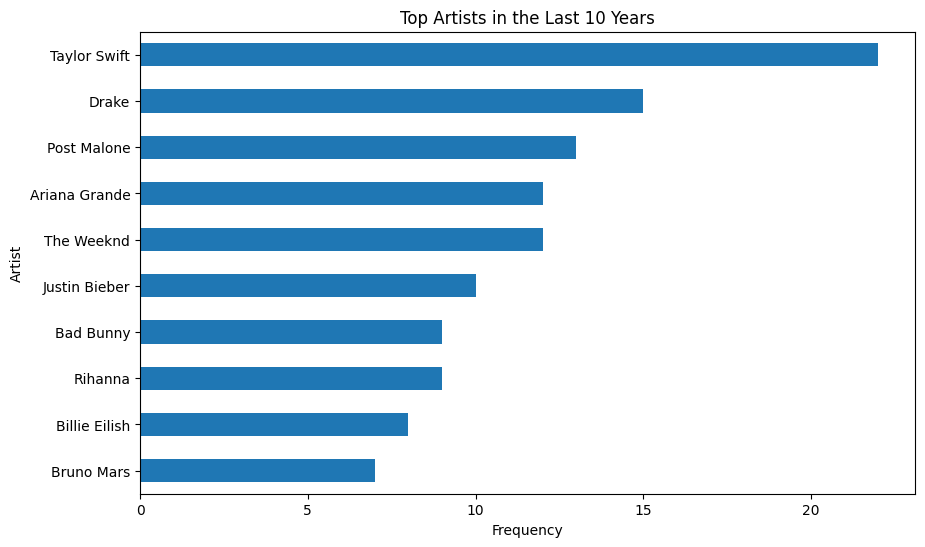

In [13]:
# Get top 10 artists
top_10_artist = top_50_artist.head(10)
# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_artist['Times in Top 50'].sort_values(ascending=True).plot(kind='barh')
plt.title('Top Artists in the Last 10 Years')
# Set labels
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.show()

These artists have appeared the most in the top hits playlists. While this doesn't necessarily mean they are the most streamed artists overall, it's still a reliable measure of their success in the charts.

We observe that Taylor Swift has the most appearances. This suggests that a key factor in her success could be her versatility and genre fluidity. She has the ability to switch between genres and adapt them to his unique style, which likely contributes to her frequent presence in the charts.


<h2>4.2 Most Popular Genre.</h2>
<h3>Track features in Spotify do not include genre information, as genres are assigned to artists rather than specific tracks.</h3> 

Given this, we can approach genre analysis by examining the top 50 artists from the past 10 years and querying their associated genres. This will allow us to identify the most prevalent genres during this period.

<h3> 4.2.1 Retrieving Artist Genres</h3>
<ul>
<li>We first needed to retrieve the Spotify ID for each artist. Spotify uses these unique identifiers to catalog all the artists, tracks, albums, and playlists in its database. </li>

<li>We started by creating an empty dictionary, `artist_id`, to store the Spotify IDs. We then iterated over the names of the artists in our `top_50_artist` DataFrame. For each artist, we used the `spotipy` library's `search` function to query Spotify's database for the artist's information. The `search` function returns a list of potential matches, and we selected the first item in this list to get the artist's Spotify ID.</li>

<li>Once we had the Spotify ID for each artist, we added it to our `artist_id` dictionary, using the artist's name as the key and the Spotify ID as the value.</li>
</ul>

In [14]:
# Initialize an empty dictionary to store the Spotify IDs
artist_id = {}

# Get the Spotify ID for each artist
for artist_name in top_50_artist.index:
    # Search for the artist
    results = sp.search(q='artist:' + str(artist_name), type='artist')

    # Check if the search returned any results
    if results['artists']['items']:
        # Get the first artist from the search results
        artist = results['artists']['items'][0]

        # Get the Spotify ID
        spotify_id = artist['id']

        # Add the Spotify ID to the dictionary
        artist_id[artist_name] = spotify_id
        time.sleep(1)
    else:
        print(f"No results found for artist: {artist_name}")

In [15]:
artist_id

{'Taylor Swift': '06HL4z0CvFAxyc27GXpf02',
 'Drake': '3TVXtAsR1Inumwj472S9r4',
 'Post Malone': '246dkjvS1zLTtiykXe5h60',
 'The Weeknd': '1Xyo4u8uXC1ZmMpatF05PJ',
 'Ariana Grande': '66CXWjxzNUsdJxJ2JdwvnR',
 'Justin Bieber': '1uNFoZAHBGtllmzznpCI3s',
 'Rihanna': '5pKCCKE2ajJHZ9KAiaK11H',
 'Bad Bunny': '4q3ewBCX7sLwd24euuV69X',
 'Billie Eilish': '6qqNVTkY8uBg9cP3Jd7DAH',
 'Bruno Mars': '0du5cEVh5yTK9QJze8zA0C',
 'Ed Sheeran': '6eUKZXaKkcviH0Ku9w2n3V',
 'Lil Nas X': '7jVv8c5Fj3E9VhNjxT4snq',
 'Olivia Rodrigo': '1McMsnEElThX1knmY4oliG',
 'Calvin Harris': '7CajNmpbOovFoOoasH2HaY',
 'Dua Lipa': '6M2wZ9GZgrQXHCFfjv46we',
 'Imagine Dragons': '53XhwfbYqKCa1cC15pYq2q',
 'Doja Cat': '5cj0lLjcoR7YOSnhnX0Po5',
 'Shawn Mendes': '7n2wHs1TKAczGzO7Dd2rGr',
 'One Direction': '4AK6F7OLvEQ5QYCBNiQWHq',
 'Harry Styles': '6KImCVD70vtIoJWnq6nGn3',
 'Flo Rida': '0jnsk9HBra6NMjO2oANoPY',
 'Travis Scott': '0Y5tJX1MQlPlqiwlOH1tJY',
 'Kendrick Lamar': '2YZyLoL8N0Wb9xBt1NhZWg',
 'Avicii': '1vCWHaC5f2uS3yhpwWbIA6',

<h3>4.2.2 Adding The 'Genres' Column </h3>
<ul>
<li>With the Spotify IDs in hand, we could retrieve the genre information for each artist. Spotify assigns genres to artists rather than individual tracks, so we can use the `artist` function to get the artist's information, which includes their genres.</li>

<li>And then, let's add a 'Genres' column to our `top_50_artist` DataFrame. We could achieve this column by mapping the artist names in the DataFrame to their corresponding genres in our `artist_id` dictionary. This will give us a complete DataFrame with the top 50 artists, the number of times they appeared in the top 50 songs over the past 10 years, and their associated genres.</li>
    </ul>

In [16]:
# Initialize an empty list to store the genres
genres = []

# Get the genre for each artist
for artist_name in top_50_artist.index:
    # Get the Spotify ID from the dictionary
    spotify_id = artist_id[artist_name]
    
    # Get the artist information from Spotify
    artist_info = sp.artist(spotify_id)
    
    # Get the genres
    artist_genres = artist_info['genres']
    
    # Add the genres to the list
    genres.append(artist_genres)

# Add the genres as a new column in the DataFrame
top_50_artist['Genres'] = genres

In [17]:
top_50_artist.head()

,Times in Top 50,Genres
Taylor Swift,22,[pop]
Drake,15,"[canadian hip hop, canadian pop, hip hop, rap,..."
Post Malone,13,"[dfw rap, melodic rap, pop, rap]"
The Weeknd,12,"[canadian contemporary r&b, canadian pop, pop]"
Ariana Grande,12,[pop]


<h3>4.2.3 Genre Analysis </h3>

Now that we have our data, let's visualize the distribution of genres among the top 50 artists over the past 10 years. This will help us understand the trends and popularity of different music genres in the industry.

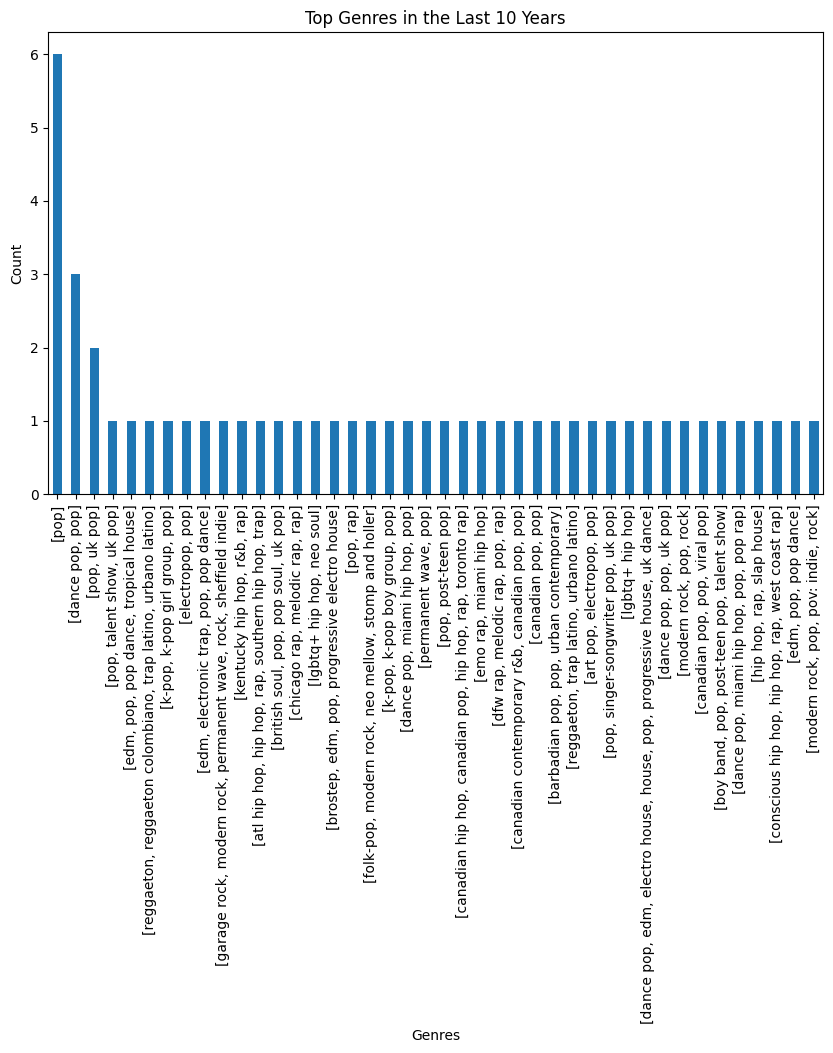

In [18]:
# Count the number of occurrences of each genre in the 'Genre' column of the DataFrame
# This gives us a Series where the index is the genre and the value is the count
genre_counts = top_50_artist['Genres'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 6))

# Create a bar plot of the genre counts
genre_counts.plot(kind='bar')

# Set the title of the plot
plt.title('Top Genres in the Last 10 Years')

# Set the labels for the x and y-axis
plt.xlabel('Genres')
plt.ylabel('Count')

# Display the plot
plt.show()

<h3>4.2.4 A More Precise Plot </h3>
<li>As we can see, the genres are being treated as a single entity because they are contained in a list. This means that each unique combination of genres is being counted as a separate genre.</li>

<li>So we need to 'flatten' these lists so that each genre is treated individually.</li>
<li>To implement this, we can use the `chain.from_iterable` function from the `itertools` library, which takes an iterable and returns a single iterator with individual genres dissected. We can then count the occurrences of each genre and plot the results as before.</li>

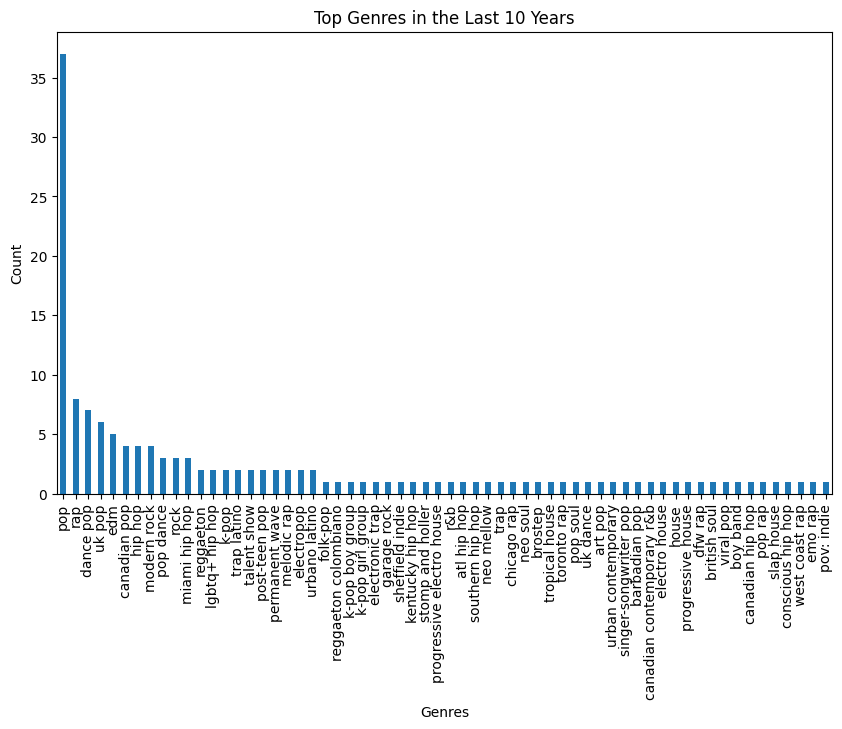

In [19]:
# Import the chain function from itertools
from itertools import chain

# Flatten the list of genres and convert it into a Series
all_genres = pd.Series(list(chain.from_iterable(top_50_artist['Genres'])))

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Create the bar plot as before
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Top Genres in the Last 10 Years')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

For the sake of visual comprehension, we will slice the list containig the top genres and keep only the top 10 genres.

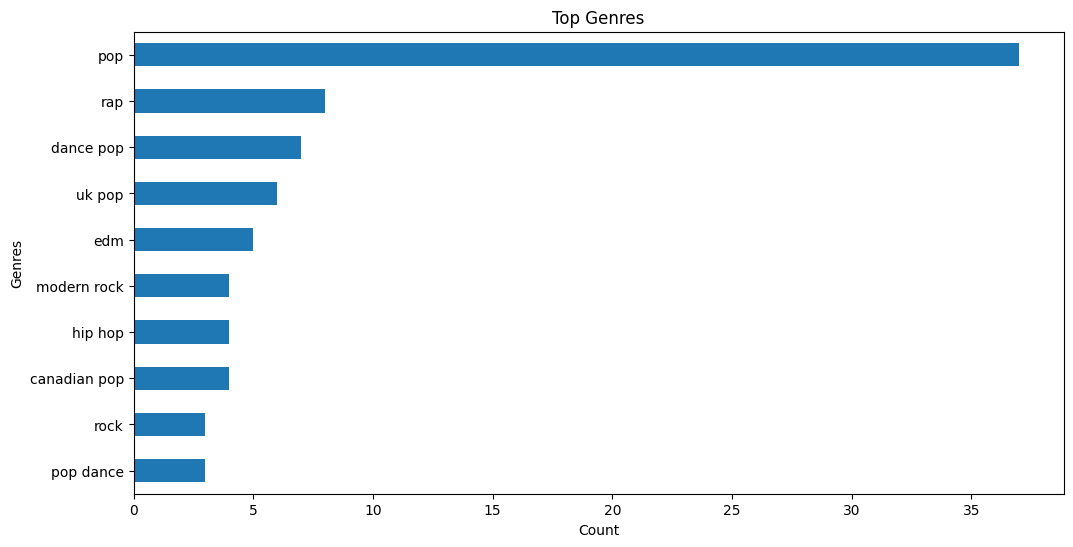

In [20]:
genre_counts = genre_counts.head(10)
genre_counts.sort_values(ascending=True).plot(kind='barh', figsize=(12, 6))
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

<h3>4.2.5 Conclusion</h3>
<li>The 'pop' genre is the most prevalent, appearing almost 35 times among the top 50 artists. This suggests that pop music has been the most dominant genre in the music industry over the past decade.</li>

<li>Following pop, 'rap' and 'uk pop' are the next most common genres. This indicates a strong presence and popularity of these genres in the music industry.</li>
<li>In conclusion, while there is a variety of popular music genres, 'pop', 'rap' have been the most dominant in the last 10 years.</li>

<h2> 4.3 Tempo Analysis</h2>
<li>In this section, we will analyze the tempo of the top hits over the past decade. Tempo, measured in beats per minute (BPM), is a crucial element of a song that can significantly influence its energy and mood.
    
<li>By examining the tempo trends in the most succesful songs, we can check what is artist's preferred tempo range.

<li>Tempo is in float data type, which most songs have rounded tempos, so we need to round them to the nearest integer for a better comprehension.

In [21]:
# Iterate over the dictionary and round the 'Tempo' column to the nearest integer
for year in top_hits.keys():
    top_hits[year]['Tempo'] = top_hits[year]['Tempo'].round().astype(int)

# Check rounded tempos
top_hits[2023]['Tempo'].head()

0    125
1     92
2    138
3    170
4    148
Name: Tempo, dtype: int32

<h3>4.3.1 Average Tempo</h3>
Let's visualize the average tempos across the last 10 years.

In [22]:
# Initialize a dictionary to store average tempo for each year
average_tempos = {}

# Calculate average tempo for each year
for year, df in top_hits.items():
    average_tempos[year] = df['Tempo'].mean()

# Convert to DataFrame for easier plotting
average_tempos_df = pd.DataFrame(list(average_tempos.items()), columns=['Year', 'Average Tempo'])

In [23]:
# Round the tempo average.
for year, tempo in average_tempos_df.items():
    average_tempos_df['Average Tempo'] = average_tempos_df['Average Tempo'].round()

average_tempos_df.head()

,Year,Average Tempo
0,2013,115.0
1,2014,124.0
2,2015,119.0
3,2016,114.0
4,2017,124.0


<h3>4.3.2 Plot Average Tempo Over Time</h3>

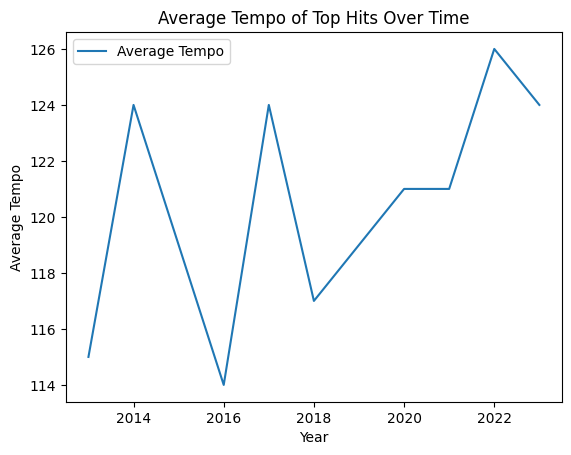

In [24]:
# Plot average tempo over time
average_tempos_df.plot(x='Year', y='Average Tempo', kind='line')
plt.title('Average Tempo of Top Hits Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.show()

<h3>4.3.3 Add 'Year' Column </h3>
Here we will append the respective year of the songs as a column in the all_years_df so its easier to plot it.

In [25]:
# Initialize all_years_df as an empty DataFrame
all_years_df = pd.DataFrame()

In [26]:
# Iterate over the top_hits dictionary
for year, df in top_hits.items():
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Add a new column for the year
    df_copy['Year'] = year
    
    # Concatenate df_copy with all_years_df
    all_years_df = pd.concat([all_years_df, df_copy], ignore_index=True)


# Display the first few rows of all_years_df
all_years_df.head()

,ID,Name,Artist,Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Year
0,4rHZZAmHpZrA3iH5zx8frV,Mirrors,Justin Timberlake,484146,82,0.574,0.512,5,-6.664,0,0.0503,0.23400,0.000000,0.0946,0.512,77,2013
1,5PUvinSo4MNqW7vmomGRS7,Blurred Lines,Robin Thicke,263053,60,0.861,0.504,7,-7.707,1,0.0489,0.00412,0.000018,0.0783,0.881,120,2013
2,4G8gkOterJn0Ywt6uhqbhp,Radioactive,Imagine Dragons,186813,76,0.448,0.784,9,-3.686,1,0.0627,0.10600,0.000108,0.6680,0.236,136,2013
3,0nrRP2bk19rLc0orkWPQk2,Wake Me Up,Avicii,247426,90,0.532,0.783,2,-5.697,1,0.0523,0.00380,0.001200,0.1610,0.643,124,2013
4,3JvKfv6T31zO0ini8iNItO,Another Love,Tom Odell,244360,94,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,123,2013


<h3>4.3.4 Average Tempo Boxplot</h3>
Let's visualize the average tempo in a different way, this time we will use the library seaborn and dra a box plot.

In [27]:
import seaborn as sns

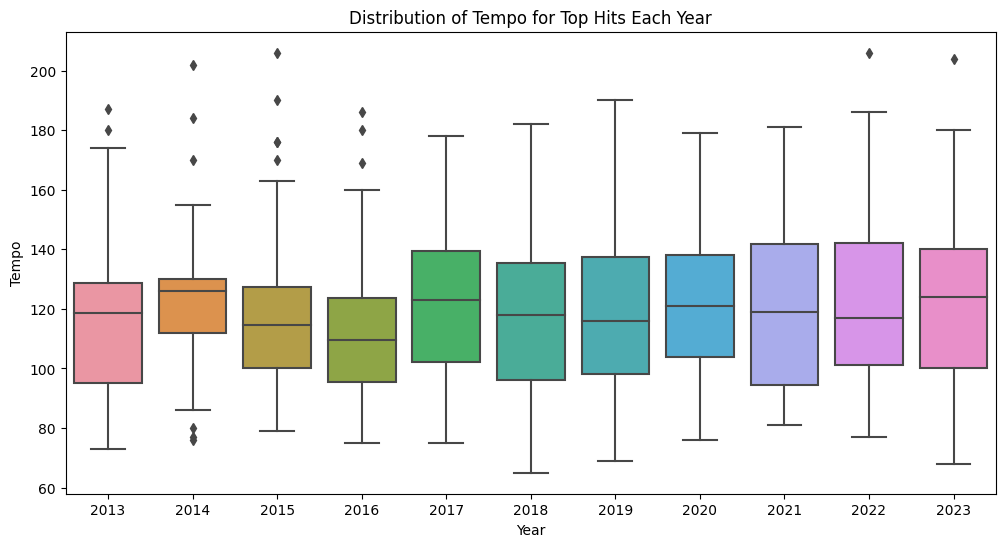

In [28]:
# Create a box plot for each year's tempo data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Tempo', data=all_years_df)
plt.title('Distribution of Tempo for Top Hits Each Year')
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.show()

<h3>4.3.5 Adjusting High Tempo Values</h3>
<li>Some songs are over 200 BPM, which that is extremely fast for the charts, making it super rare. 
<li>Sometimes the tempo detector algorithm assumes the song is double tempo when its actually not. 
<li>To fix this, we will divide the tempo in half of those songs with BPM above 200.

In [29]:
# Locate those tracks and divide it by 2
all_years_df.loc[all_years_df['Tempo'] > 200, 'Tempo'] = all_years_df.loc[all_years_df['Tempo'] > 200, 'Tempo'] / 2

In [30]:
# Fastest songs in terms of Beats Per Minutes
all_years_df['Tempo'].max()

190

In [31]:
# Slowest songs in terms of Beats Per Minutes
all_years_df['Tempo'].min()

65

<li>Effectively, we see that the fastest song is 190 BPM and the slowest 65 BPM. 

<h3>4.3.6 Conclusion</h3>
<li>Our analysis of the tempo of top hits over the past decade reveals some interesting trends in the music industry. We observed a general increase in the average tempo of songs over the years, indicating a shift towards faster-paced music in the popular sphere.</li>
<li>Additionally, we found that the average tempo for the top hits in the last ten years has consistently stayed within the range of 115 to 130 beats per minute (BPM). This suggests that songs within this tempo range are more likely to become popular and reach the top charts.</li>
<li>For artists and songwriters aiming to produce a hit song, it might be beneficial to consider writing songs within this tempo range. Of course, the success of a song depends on many factors, and tempo is just one of them. However, understanding these trends can provide valuable insights into the preferences of listeners and the evolving landscape of the music industry.</li>

<h2>4.4 Duration Analysis</h2>

<p>In this section, we will be exploring the duration of the top hit songs over the past decade.</p>

<ul>
  <li>The trend in the duration of top songs over the years. Are songs getting shorter or longer?</li>
  <li>The distribution of song durations. What is the most common duration for a hit song?</li>
  <li>The relationship between song duration and other variables. For example, does song duration correlate with popularity, tempo, or any other characteristic?</li>
</ul>

In [32]:
import numpy as np

In [33]:
# Create a column with duration in minutes from the duration in ms column
all_years_df['Duration_min'] = all_years_df['Duration'] / 60000

<h3>4.4.1 Duration Distribution</h3>
Now that we have converted the duration data from miliseconds to minutes, we can start plotting the data distribution.

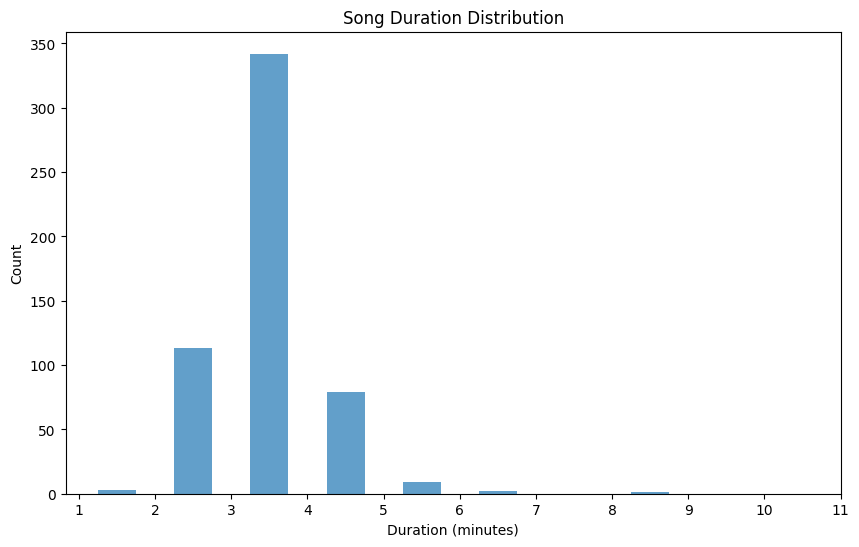

In [34]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(all_years_df['Duration_min'], bins=range(int(min(all_years_df['Duration_min'])), int(max(all_years_df['Duration_min'])) + 1, 1), alpha=0.7, rwidth=0.5)

# Set the x-axis ticks
plt.xticks(np.arange(int(min(all_years_df['Duration_min'])), max(all_years_df['Duration_min']) + 1, 1))

plt.title('Song Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


<p>From this plot, we can observe that the most common duration for a song is between 3 and 4 minutes. In fact, over 120 songs in our dataset fall within this duration range. This suggests that songs within this duration are more likely to become popular and make it to the top hits.</p>

<h3>4.4.2 Average Duration</h3>
In the next section, we:
<li>Calculate the average song duration for each year and store these in a dictionary.</li>
<li>Convert this dictionary to a pandas Series for easier plotting.</li>
<li>Create a line plot to visualize the trend of average song durations over time.</li>

In [35]:
# Calculate the average duration for each year
avg_durations = all_years_df.groupby('Year')['Duration_min'].mean().to_dict()

avg_durations

{2013: 3.921619,
 2014: 3.709437,
 2015: 3.667942,
 2016: 3.7040343333333334,
 2017: 3.662898666666667,
 2018: 3.4388780000000003,
 2019: 3.294321666666667,
 2020: 3.3057873333333334,
 2021: 3.3880036666666666,
 2022: 3.2868193333333333,
 2023: 3.209664}

<h3>4.4.3 Plot Average Duration Over Time</h3>

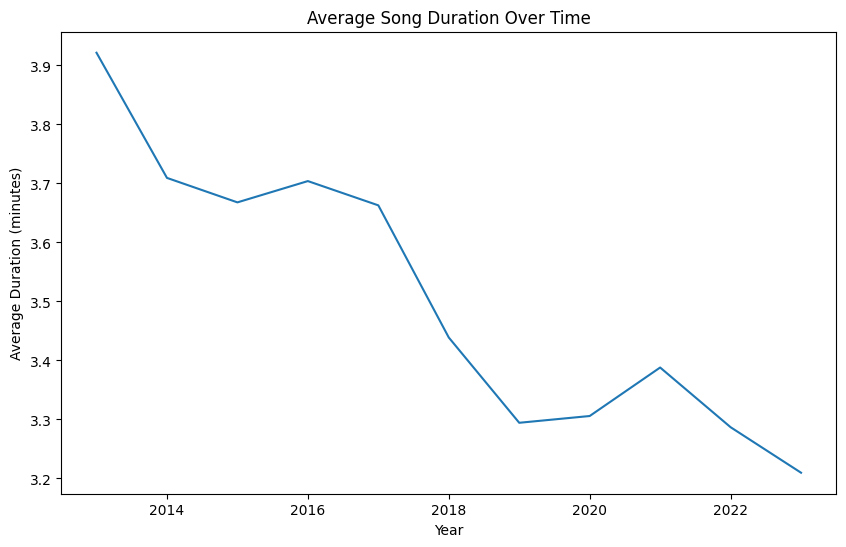

In [36]:
# Convert the dictionary to a pandas Series for easier plotting
avg_durations_series = pd.Series(avg_durations)

# Plot the average song durations over time
plt.figure(figsize=(10, 6))
avg_durations_series.plot(kind='line')
plt.title('Average Song Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

The graph indicates a trend towards shorter songs over the past decade. This could be due to various factors such as fast-paced social media trends like TikTok or the influence of streaming platforms.

<h3>4.4.4 Standard Deviation and Mean</h3>
In this section, we will calculate the standard deviation and the mean to finally plot the normal distribution.

In [37]:
# Import necessary libraries
from scipy.stats import norm

# Calculate the mean and standard deviation
mu, std = norm.fit(all_years_df['Duration_min'])

# Print the mean and standard deviation
print('Mean: ', mu)
print('Std Dev: ', std)

Mean:  3.508127727272727
Std Dev:  0.7156344361406104


C:\Users\rami0\AppData\Local\Temp\ipykernel_26880\1093288354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_years_df['Duration_min'], hist=True, kde=True,


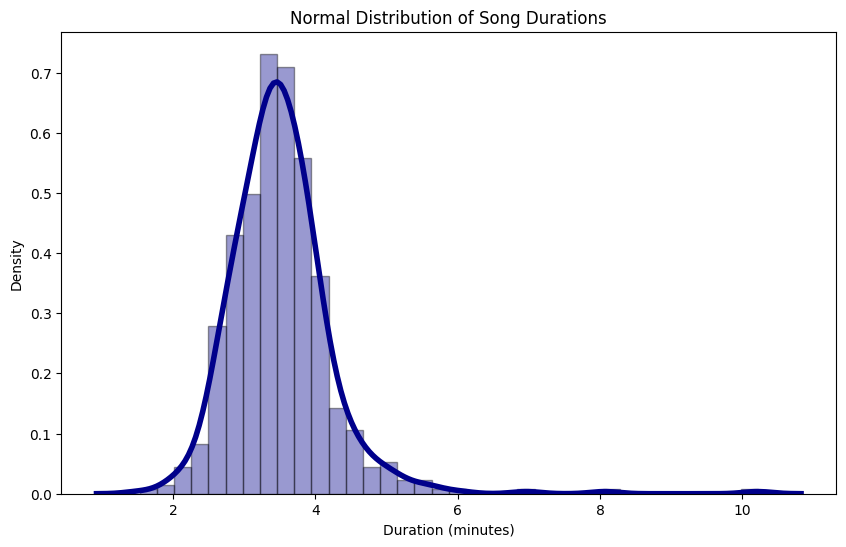

In [38]:
# Plot the distribution of song durations
plt.figure(figsize=(10, 6))
sns.distplot(all_years_df['Duration_min'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Normal Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.show()

<h2>4.5 Key and Mode Analysis</h2>
<li>The key of a song tells us the tonal center or home base of the song. This is the note that the music revolves around.</li>
<li>In Spotify's data, the key of the song is represented as integers between 0 and 11, which map to pitches using standard Pitch Class notation (e.g., 0 = C, 1 = C#/Db, 2 = D, and so on).</li>
<li>The mode indicates whether a song is major (happy) or minor (sad). In Spotify's data, major is represented by 1 and minor is represented by 0.</li>

<h3>4.5.1 Count the frequency of each key in the dataset and plot a bar chart </h3>

This step will help us understand which keys are most common in popular songs.

We are going to start by creating a dictionary to which we can map the numbers Spotify assigned to each note.

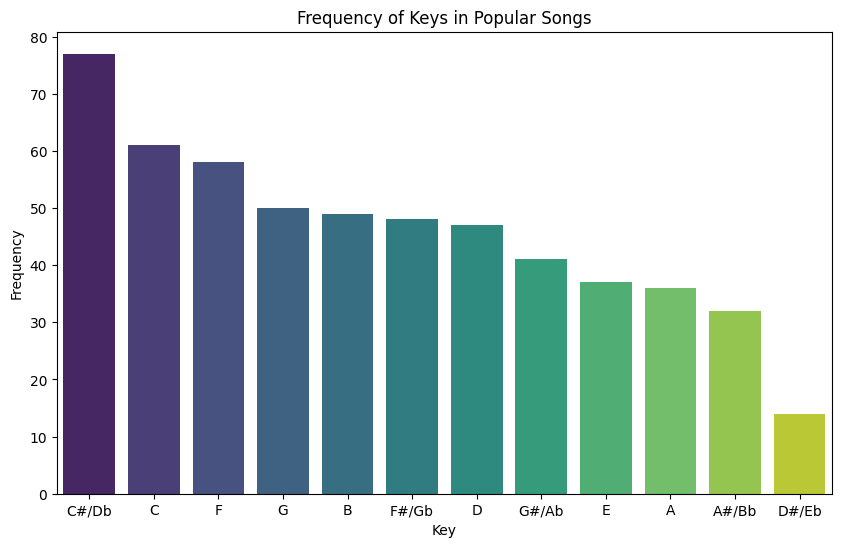

In [39]:
# Create a dictionary to map the keys to pitch class notation
key_dict = {0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F', 6: 'F#/Gb', 7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'}

# Replace the keys in the DataFrame
all_years_df['Key'] = all_years_df['Key'].replace(key_dict)

# Count the frequency of each key
key_counts = all_years_df['Key'].value_counts()

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=key_counts.index, y=key_counts.values, palette='viridis')

# Set the title and labels
plt.title('Frequency of Keys in Popular Songs')
plt.xlabel('Key')
plt.ylabel('Frequency')

# Display the plot
plt.show()

This plot is showing us that the most popular note in the Top Charts have is C#.

<h3>4.5.2 Minor or Major</h3>
Next, we will check the mode (minor or major).

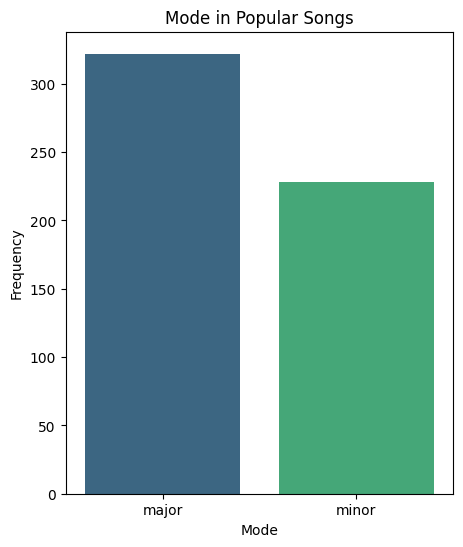

In [40]:
# Lets map the values 0 to minor and 1 to major and change the column in the Data Frame
mode_dict = {0: 'minor', 1: 'major'}
all_years_df['Mode'] = all_years_df['Mode'].replace(mode_dict)

# Major and Minor count
mode_counts = all_years_df['Mode'].value_counts()

# Create a figure
plt.figure(figsize=(5, 6))

# Create a bar plot
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette='viridis')

# Set the title and labels
plt.title('Mode in Popular Songs')
plt.xlabel('Mode')
plt.ylabel('Frequency')

# Display the plot
plt.show()

This plot is showing us that the most popular type of chord in the Top Charts is major.
Although is not for a huge difference, its pretty equal.

In [41]:
# Calculate the percentage of songs in major mode
major_percentage = round(all_years_df[all_years_df['Mode'] == 'major'].shape[0] * 100 / all_years_df.shape[0])
print(f'Major: {major_percentage}%')

# Calculate the percentage of songs in minor mode
minor_percentage = round(all_years_df[all_years_df['Mode'] == 'minor'].shape[0] * 100 / all_years_df.shape[0])
print(f'Minor: {minor_percentage}%')

Major: 59%
Minor: 41%


<h3>4.5.3 Mode and Key combination (Chords)</h3>
Let's combine the Key and Mode of the songs to determine the favorite chords of top artists. 

In [42]:
# Create a new column 'Mode/Key' that combines the 'Mode' and 'Key' columns
all_years_df['Mode/Key'] = all_years_df['Key'] + ' ' + all_years_df['Mode']

# Count the frequency of each mode/key combination
mode_key_counts = all_years_df['Mode/Key'].value_counts()

# Print the most common mode/key combinations
mode_key_counts.head()

C#/Db major    50
D major        40
C major        38
G major        33
F major        32
Name: Mode/Key, dtype: int64

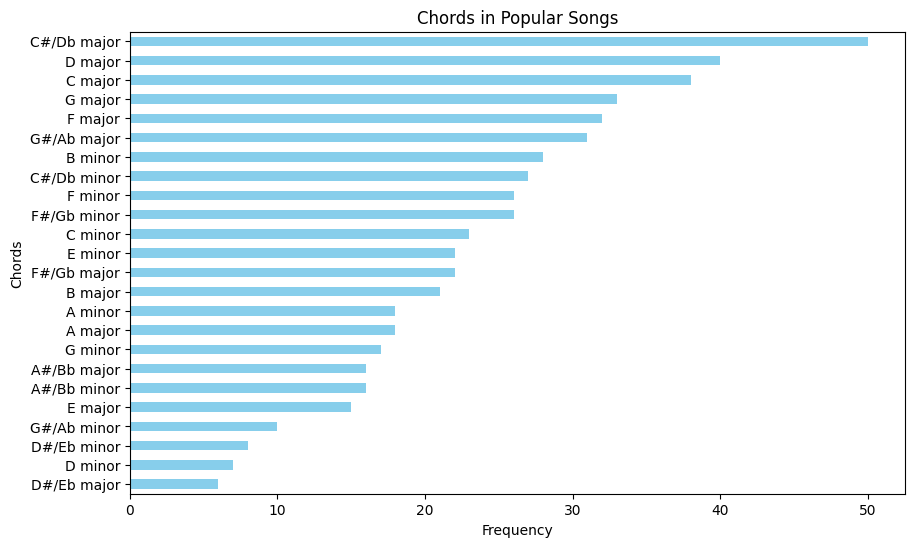

In [43]:
# Create a bar plot
plt.figure(figsize=(10, 6))
mode_key_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Chords in Popular Songs')
plt.xlabel('Frequency')
plt.ylabel('Chords')
plt.show()

<h3>4.5.4 Conclusion</h3>
<p>Our analysis reveals an interesting trend: the chord C# Major appears to be the most popular among the top hits. With 50 songs written in this key, it's clear that this chord resonates with both artists and listeners. This could be due to a variety of factors, including the tonal qualities of the chord itself or cultural associations with this key. It's also possible that listeners have grown accustomed to this key, leading to a preference for songs written in C# Major. This insight could be valuable for songwriters and producers aiming to create a hit song.</p>

<h3> With the most used tempo and chord, we can conclude that writing a song in C# Major, in a tempo between 115 and 130 BPM, will elevate the chances of the song becoming a hit.</h3>

<h1>5. Popularity Predictor Model</h1> <a name='model'></a>
<h2>5.1 Linear Regression</h2>
<li>In the following section, we will be creating a linear regression model to predict the popularity of a song based on its audio features.</li>

<li>Linear regression is a statistical method that allows us to study the relationship between two continuous quantitative variables.</li>

In [44]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

We need to find variables that have a positive linear relationship with the popularity score, so we can make a more accurate model. 
For this, we can use a heatmap, that displays the relationship between all pairs of variables, and detect the ones that better fit our model.

C:\Users\rami0\AppData\Local\Temp\ipykernel_26880\1322805574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = all_years_df.corr()


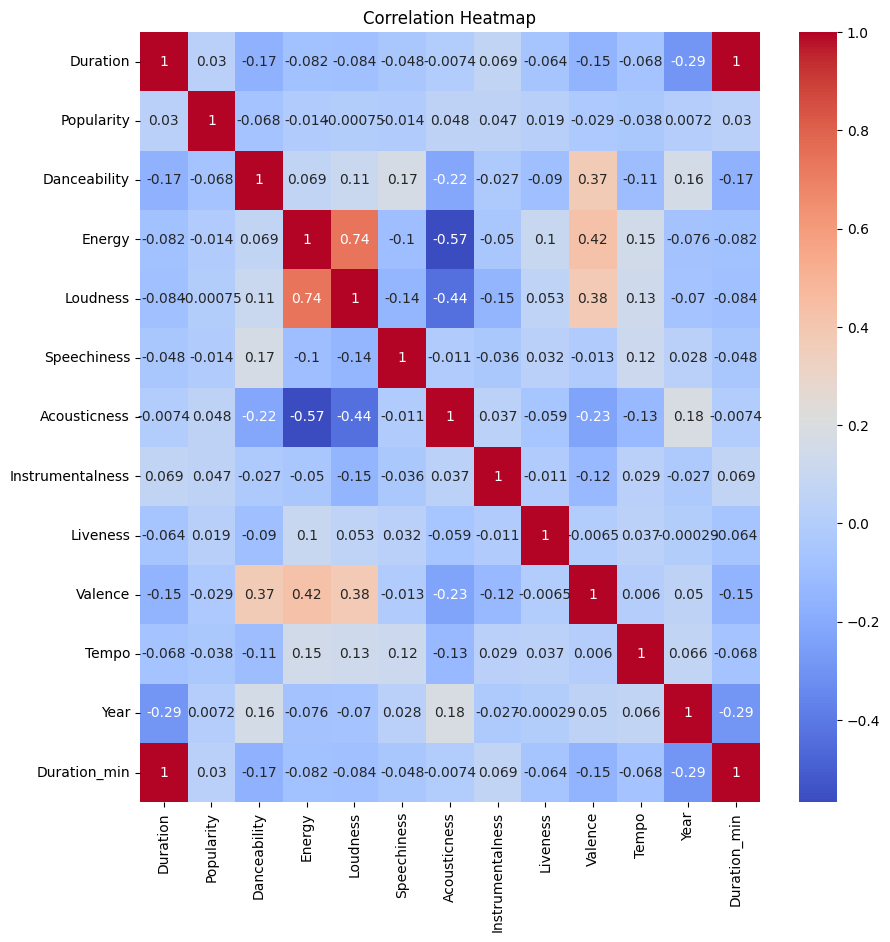

In [45]:
# Calculate the correlation matrix
corr_matrix = all_years_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We can see that <b>'Danceability'</b>, <b>'Energy'</b> and <b>'Loudness'</b> have a positive linear relationship with popularity, altought they might not have the best correlation, we still can use them to build our predictive model.


In [46]:
# Define predictor variables and target variable
x = all_years_df.loc[:,['Energy','Danceability','Loudness']].values
y = all_years_df.loc[:,'Popularity'].values

The model will be trained on a subset of our data (the training set), and then we will test the model's performance on another subset (the test set). We will evaluate the model's performance using several metrics, including the mean absolute error, mean squared error, and root mean squared error.

In [47]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the intercept and coefficients of the model
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: 89.07137990504414
Coefficients: [-1.50053305e+00 -9.64344728e+00  7.34274311e-03]


In [48]:
# Use the fitted model to predict the popularity scores for the tracks in the test set
y_pred = regressor.predict(X_test)

# Create a DataFrame to display the actual and predicted popularity scores for the test set
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output.head())

   Actual  Predicted
0      81  82.468625
1      86  81.650196
2      86  80.214140
3      84  84.778021
4      84  81.292472


In [49]:
# Calculate and print the mean absolute error, mean squared error, and root mean squared error of the predictions to see its accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.9133265545413725
Mean Squared Error: 175.61574320579396
Root Mean Squared Error: 13.252009025268356


Next, we will visualize the relationship between the actual and predicted popularity scores for the songs in the test set.

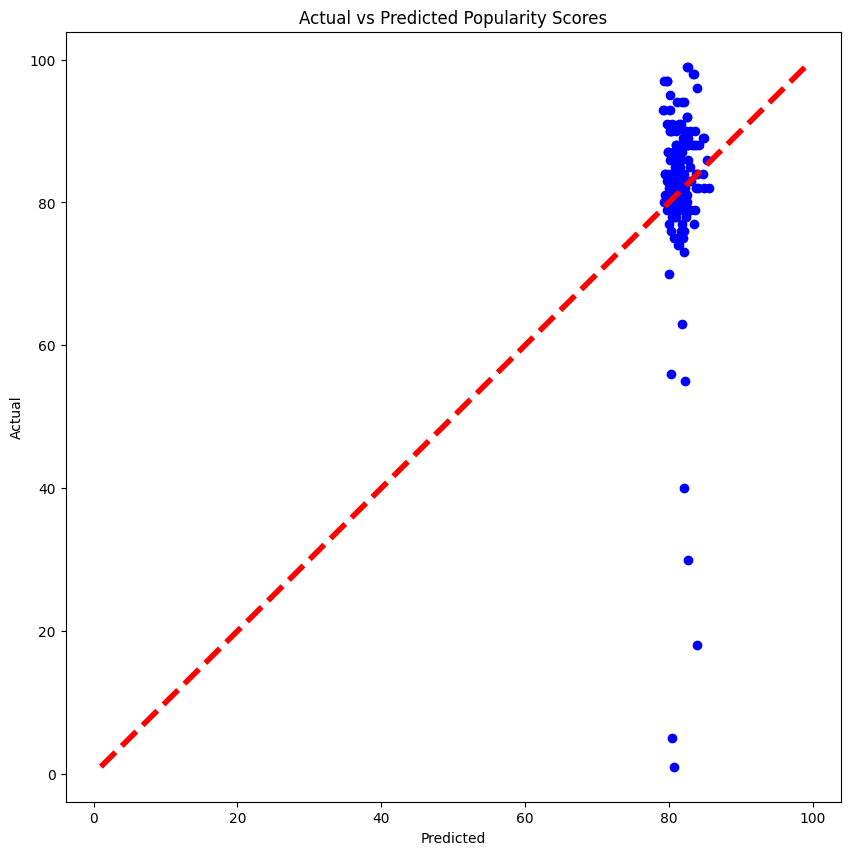

In [50]:
# Create a scatter plot to visualize the relationship between the predicted and actual popularity scores for the test set
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Popularity Scores')
plt.show()

Each point on the plot represents a song. The x-coordinate of the point is the predicted popularity score for the song (as predicted by our linear regression model), and the y-coordinate is the actual popularity score.

The dashed line represents the line of perfect prediction, where the predicted score is exactly equal to the actual score. If our model were perfect, all the points would lie on this line.

However, in reality, we see that the points are scattered around the line, indicating that there are some prediction errors. The closer a point is to the line, the smaller the prediction error for that song. Points that are far away from the line represent songs where the predicted popularity score was quite different from the actual score.

<AxesSubplot:>

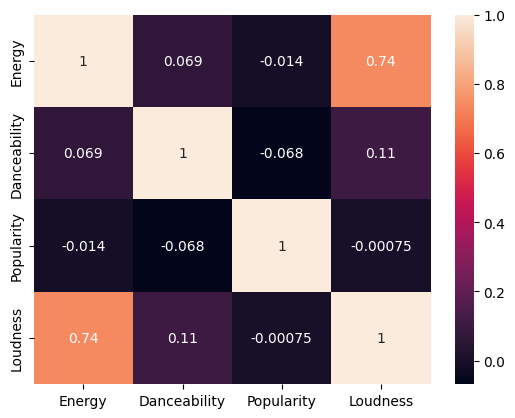

In [51]:
# Create a subset with the columns we need
df_subset = all_years_df[['Energy', 'Danceability', 'Popularity', 'Loudness']]

# Calculate the correlation
corr_matrix = df_subset.corr()

# Show the heatmap
sns.heatmap(corr_matrix, annot=True)

According to the heatmap, we can see that the best linear relationship between these variables is the one between 'Energy' and 'Loudness'.

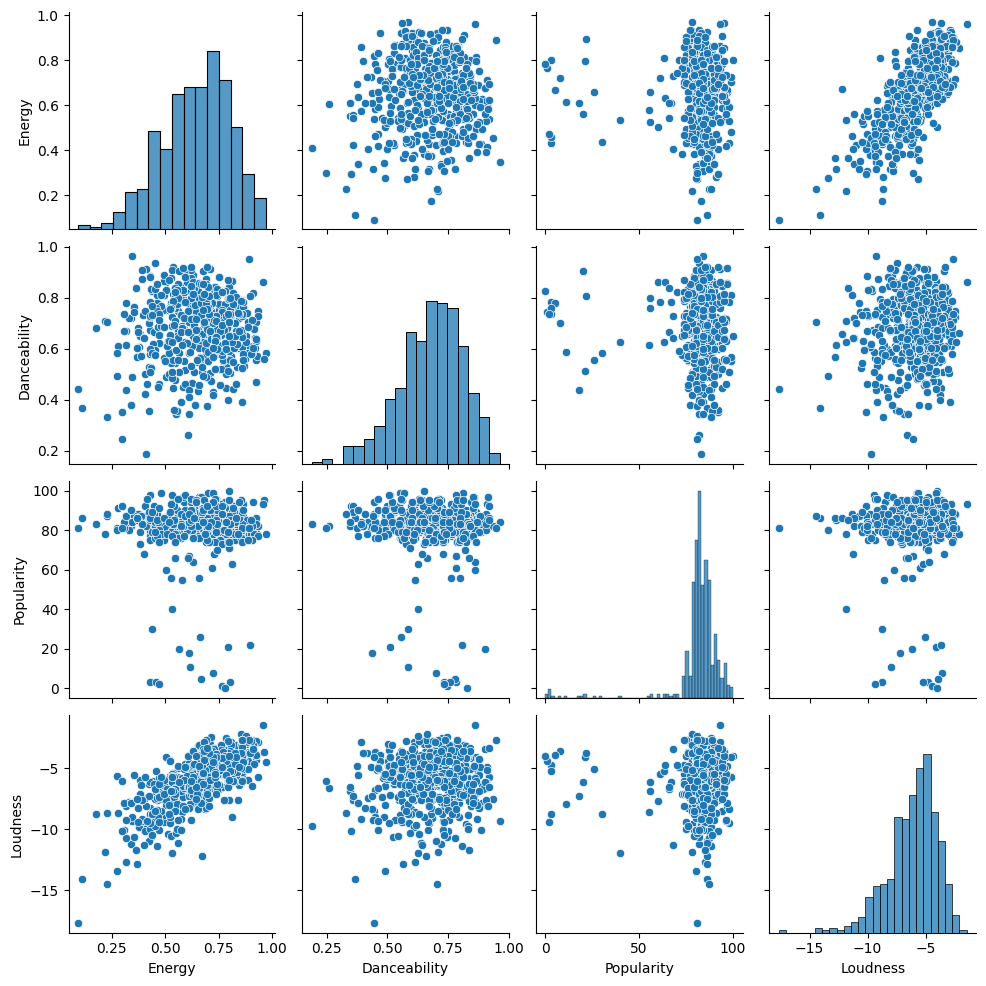

In [52]:
# Display a more detailed graph of Linear Relationship between pairs of variables.
sns.pairplot(df_subset)

Due to the weak relationships between the variables, the model did not perform well. 

This indicates that linear regression may not be the best approach for this particular problem. Future work could explore other types of predictive models that can handle complex, non-linear relationships between variables.

<h1>6. Conclusion</h1> <a name='conclusion'></a>
Our exploratory data analysis revealed that there is no strong correlation between these audio features and the popularity of the songs. This suggests that the popularity of a song is likely influenced by a complex combination of factors, not just its audio features.

Throughout this project, we have explored and analyzed the top 50 most popular songs on Spotify from 2013 to 2023. 

It has provided valuable insights into the characteristics of popular songs on Spotify. It has also highlighted the challenges and complexities involved in predicting the popularity of a song. Despite these challenges, this project has demonstrated the power and potential of data analysis and machine learning in the music industry.

## Author: 
[Ramiro Muniz](https://www.linkedin.com/in/ramiro-muniz/)